# Analysis of University Admissions Data
### Entonces, analicemos los datos y predigamos la probabilidad de admisión del estudiante en una universidad en particular en función de varios parámetros.
### Las diferentes entidades o parámetros en el conjunto de datos son:
- Serial No : Identificador del aspirante.
- GRE Scrore : Puntaje de la prueba GRE, que es una prueba importante para la admisión en el proceso de solicitud de la escuela de posgrado o la escuela de negocios a nivel mundial.
- TOEFL Score : Prueba de puntuación del examen de inglés como lengua extranjera.
- Universiting Rating : Calificación de la Universidad sobre 5.
- SOP : Relacionado con la Declaración de Propósito (SOP) para aplicar a un curso o universidad en particular.
- LOR : Algún puntaje relacionado con LOR, es decir, una carta de recomendación.
- CGPA : Es una medida de desempeño anterior del aspirante.
- Research : Binary values of either 1 or 0.
- Chance of Admit : Probabilidad de que el estudiante entre.


## Importarmos las librerias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Latex, Math, display
from sklearn.linear_model import LinearRegression
from IPython.display import Image
import statsmodels.formula.api as smf

## Cargamos los Datos

In [3]:
data = pd.read_csv(r"C:\Users\guill\Desktop\p\MC\Temas\tareas\adm_data.csv", index_col= 0)
data.head()

,GRE_Score,TOEF_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


##### Se crea una lista donde se guardara el nombre de las columnas

In [4]:
x = data.columns.values.tolist()
y = "Chance_of_Admit"

##### Se revisa que los datos no haya un N/A

In [5]:
null = []
for i in x:
    null.append(pd.isnull(data[i]).values.ravel().sum())
null

[0, 0, 0, 0, 0, 0, 0, 0]

## Definición de funciones que se usaran

In [6]:
def coeficiente_pearson(data, var1, var2):
    #Coeficiente de pearson
    df = data
    c1 = []
    c2 = []
    c3 = []
    c1 = ( df[var1] - np.mean(df[var1])) * ( df[var2] - np.mean(df[var2]) )
    #Varianza de uno de las variables
    c2 = (df[var1] - np.mean(df[var1]))**2
    #Varianza de la otra variable
    c3 = (df[var2] - np.mean(df[var2]))**2
    #Calculo del coeficiente de pearso
    resultado = sum(c1) / np.sqrt(sum(c2)*sum(c3))

    return resultado

In [7]:
def regresion_lineal(data,x,y):
    aux_m = []
    y_valores = data[y].tolist()
    arrays = []
    for i in x:
        arrays.append(data[i].tolist())
    for i in data[y]:
        aux_m.append(1)
    
    matriz_y = np.transpose(np.array(y_valores))

    matriz_x_t = np.array(aux_m)

    for i in range(len(arrays)):
        matriz_x_t = np.vstack((matriz_x_t,arrays[i]))
    
    matriz_x = np.transpose(matriz_x_t)

    beta = []
    beta = np.dot(np.linalg.inv(np.dot(matriz_x_t, matriz_x)),np.dot(matriz_x_t,matriz_y)).tolist()
    return beta

## Plots

### Creación de mapa de calor

Matriz de coeficientes lineales para cada variable del dataset


<AxesSubplot:>

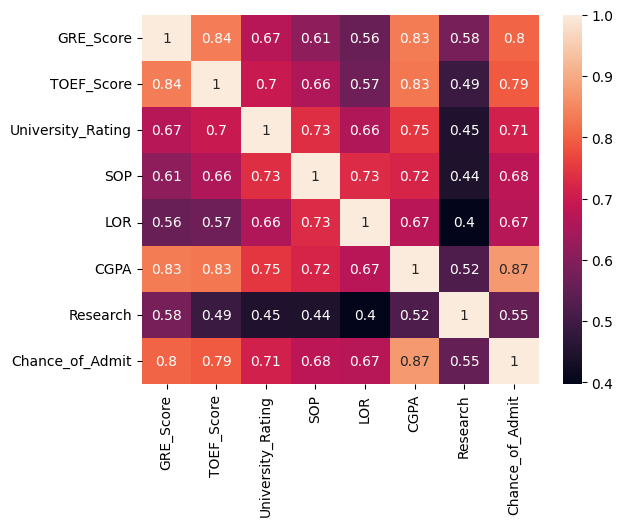

In [8]:
lista = []
aux = []
for i in x:
    for j in x:
        aux.append(coeficiente_pearson(data,i,j))
    lista.append(aux)
    aux = []
lista  
matriz_pearson = np.array(lista)
matriz_pearson
print("Matriz de coeficientes lineales para cada variable del dataset")
sns.heatmap(matriz_pearson, linecolor="white",annot = True , xticklabels=x, yticklabels=x)


In [9]:
resultado = zip(x,matriz_pearson[7])
print('Esta son los coeficientes de linealidad (Coeficiente de Pearson) de todas las variables respecto a la variable a predecir "Chance of Admit"')
print(list(resultado))
print("Recordando que la prueba de coeficciente de correlación de Pearson nos dice que tanta dependencia lineal hay en un par de variables")
display(Math (r'r_xy = \frac{\sum_{i = 1}^{n} (x_i - \bar{x})(y_i - \bar{y}))}{\sqrt[2]{\sum_{i = 1}^{n} (x_i - \bar{x})^2} \sqrt[2]{\sum_{i = 1}^{n} (y_i - \bar{y})^2}}' ))
display(Math(r'Donde: \\ \ -1 < r < 1'))
display(Math(r'\begin{cases} r > .6 \Rightarrow Existe \ una \ correlación \ positiva \\ -.6 < r < .6 \Rightarrow \ La \ relación \ es \ casualidad \\ -.6 < r  \Rightarrow Existe \ una \ correlación \ negativa   \end{cases}'))

Esta son los coeficientes de linealidad (Coeficiente de Pearson) de todas las variables respecto a la variable a predecir "Chance of Admit"
[('GRE_Score', 0.8026104595903508), ('TOEF_Score', 0.7915939869351032), ('University_Rating', 0.7112502503917211), ('SOP', 0.6757318583886718), ('LOR', 0.6698887920106948), ('CGPA', 0.8732890993552993), ('Research', 0.5532021370190391), ('Chance_of_Admit', 1.0)]
Recordando que la prueba de coeficciente de correlación de Pearson nos dice que tanta dependencia lineal hay en un par de variables


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Plots GRE Score

<AxesSubplot:xlabel='GRE_Score'>

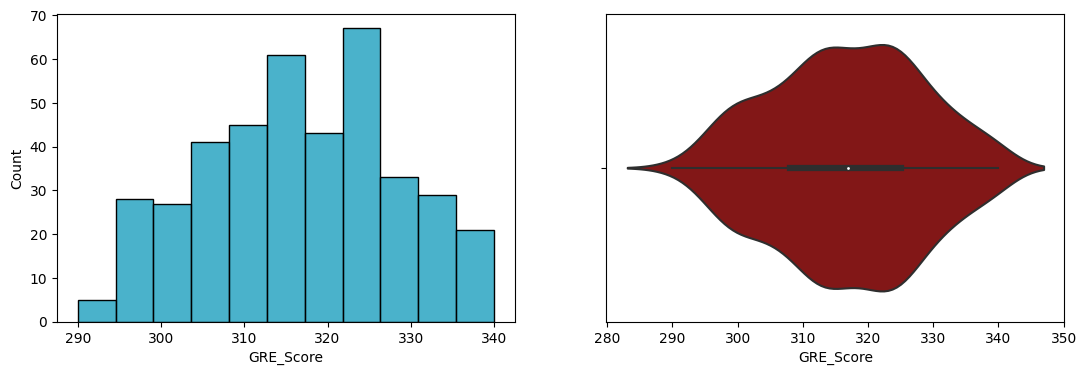

In [10]:
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
sns.histplot(x="GRE_Score", data=data,color='#0D98BA')
plt.subplot(1,2,2)
sns.violinplot(x = "GRE_Score", data = data, color = '#990000', saturation = .7)

### Plots Toefl score

<AxesSubplot:xlabel='TOEF_Score'>

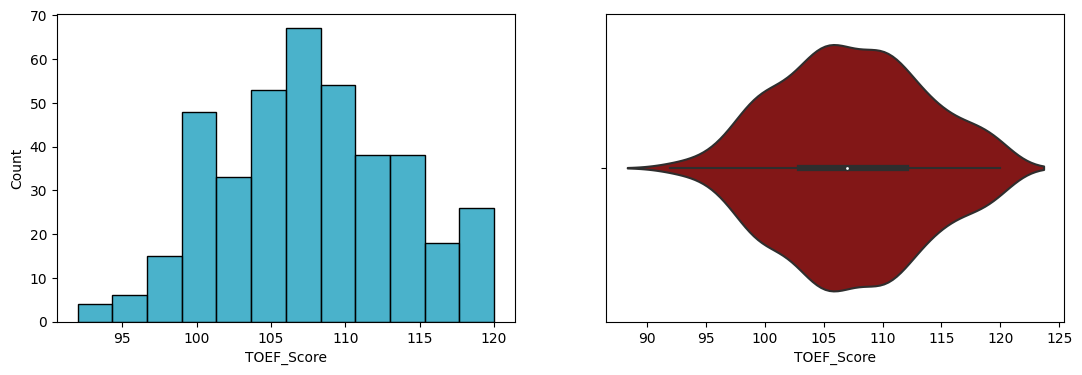

In [11]:
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
sns.histplot(x="TOEF_Score", data=data,color='#0D98BA')
plt.subplot(1,2,2)
sns.violinplot(x = "TOEF_Score", data = data, color = '#990000', saturation = .7)

### Plots de University Rating

<AxesSubplot:xlabel='University_Rating', ylabel='count'>

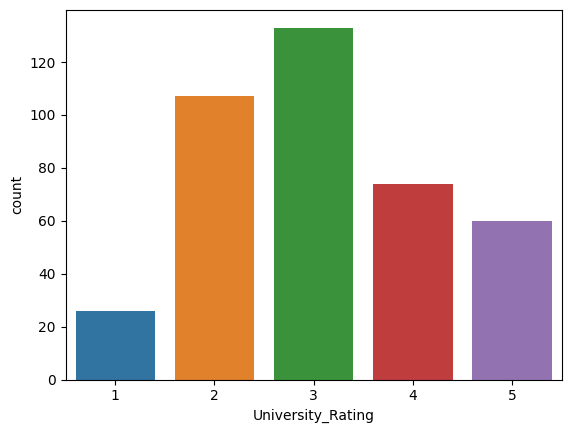

In [12]:
sns.countplot(x=data["University_Rating"])

### Plots SOP

<AxesSubplot:xlabel='SOP', ylabel='count'>

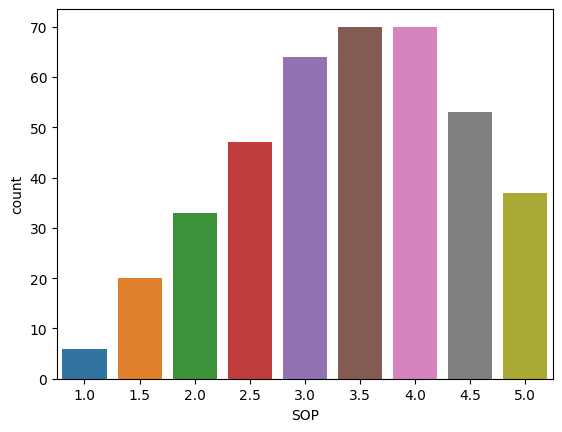

In [13]:
sns.countplot(x=data["SOP"])

### Plots LOR 

<AxesSubplot:xlabel='LOR', ylabel='count'>

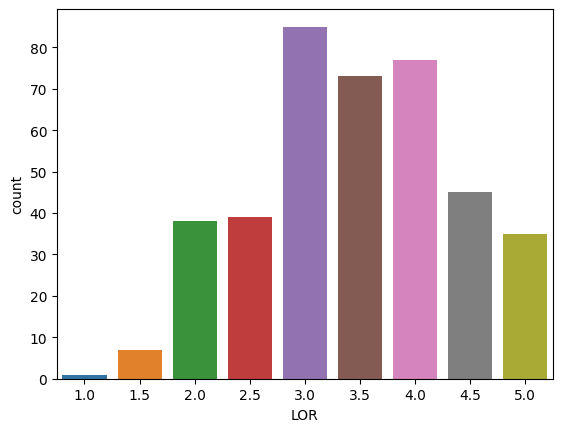

In [14]:
sns.countplot(x=data["LOR"])

### Plots CGPA

<AxesSubplot:xlabel='CGPA'>

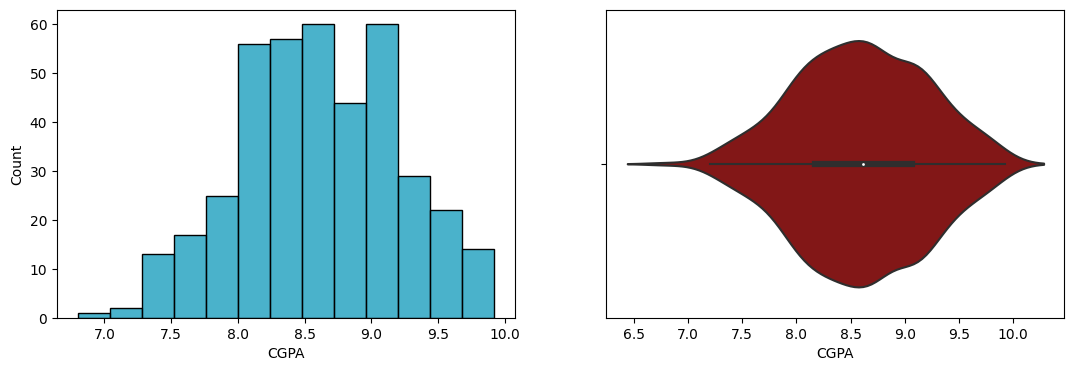

In [15]:
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
sns.histplot(x="CGPA", data=data,color='#0D98BA')
plt.subplot(1,2,2)
sns.violinplot(x = "CGPA", data = data, color = '#990000', saturation = .7)

### Plot Research

<AxesSubplot:xlabel='Research', ylabel='count'>

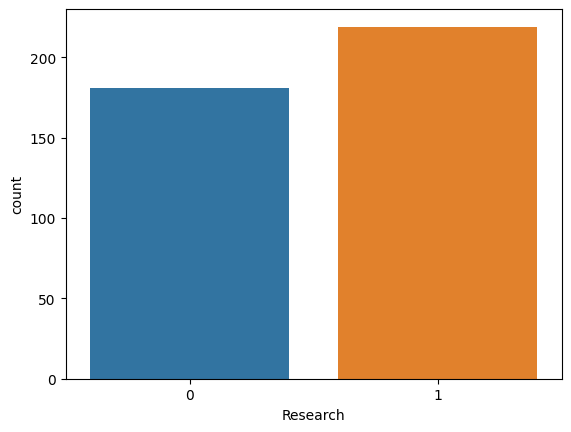

In [16]:
sns.countplot(x=data["Research"])

### Con estas graficas nos podemos dar una idea del comportamiento de los datos respecto a la variable a predecir, también al observar el mapa de calor vemos un comportamiento extraño respecto a la variable “Research”, así como la siguiente tarea vamos a observar como se comportan las variables de más peso contra la variable a predecir teniendo en cuenta la variable “research”

### Regresión lineal simple GRE Score observando el comportamiento de las variables categoricas

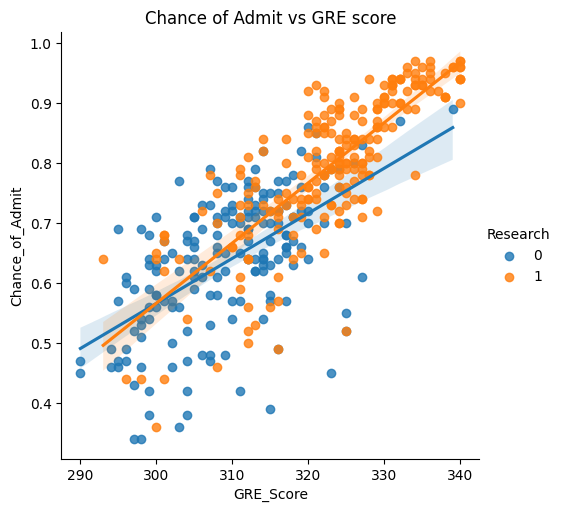

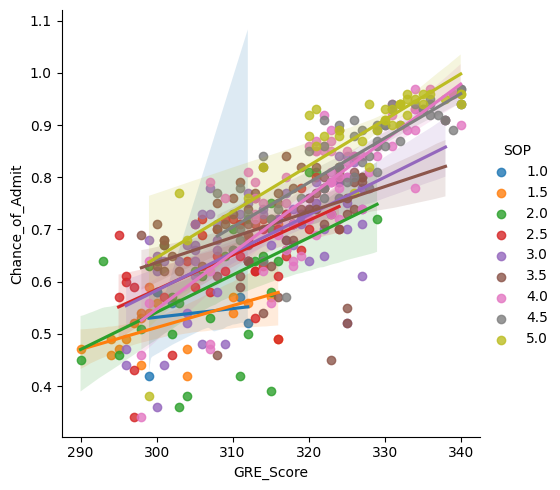

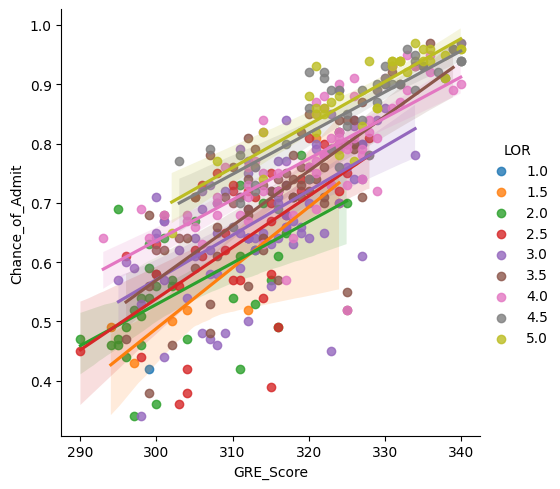

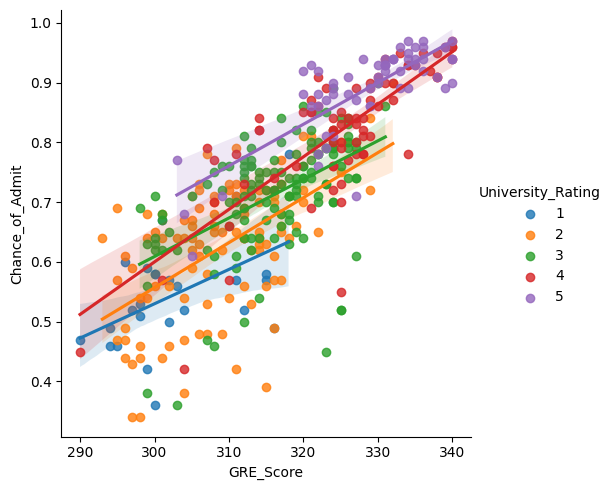

In [17]:
sns.lmplot(x='GRE_Score',y='Chance_of_Admit',data=data,hue='Research')

plt.title('Chance of Admit vs GRE score')
sns.lmplot(x='GRE_Score',y='Chance_of_Admit',data=data,hue='SOP')
sns.lmplot(x='GRE_Score',y='Chance_of_Admit',data=data,hue='LOR')
sns.lmplot(x='GRE_Score',y='Chance_of_Admit',data=data,hue='University_Rating')

### Regresión lineal simple TOEFL Score observando el comportamiento de la variable Research

Text(0.5, 1.0, 'Chance of Admit vs TOEFL score')

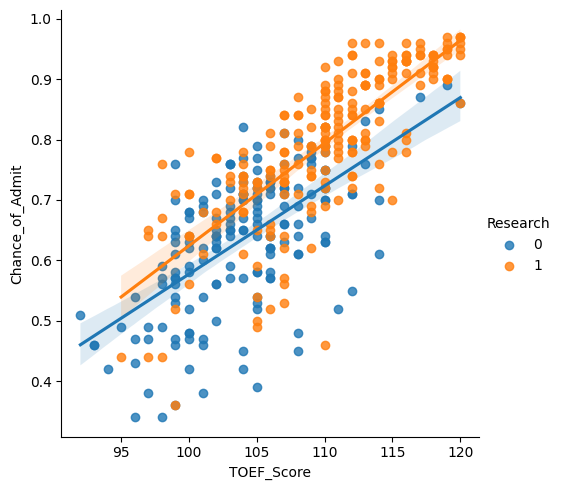

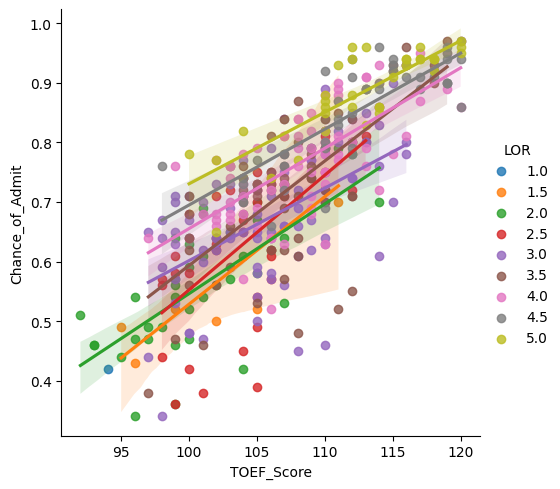

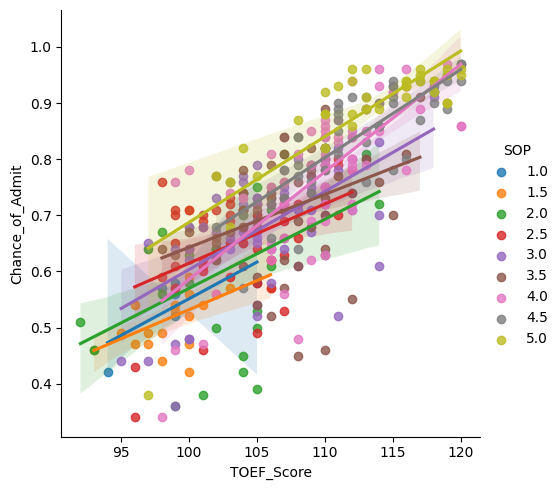

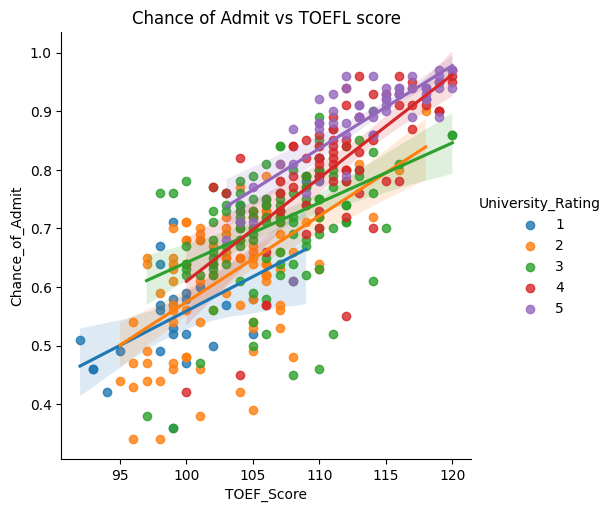

In [18]:
sns.lmplot(x='TOEF_Score',y='Chance_of_Admit',data=data ,hue='Research')
sns.lmplot(x='TOEF_Score',y='Chance_of_Admit',data=data ,hue='LOR')
sns.lmplot(x='TOEF_Score',y='Chance_of_Admit',data=data ,hue='SOP')
sns.lmplot(x='TOEF_Score',y='Chance_of_Admit',data=data ,hue='University_Rating')
plt.title('Chance of Admit vs TOEFL score')

### Regresión lineal simple CGPA observando el comportamiento de la variable Research

Text(0.5, 1.0, 'Chance of Admit vs CGPA score')

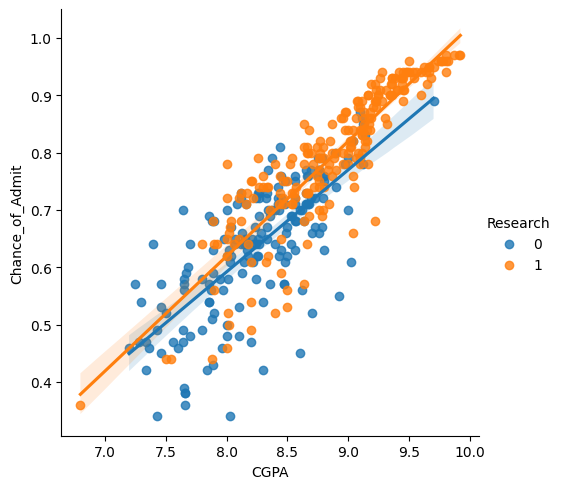

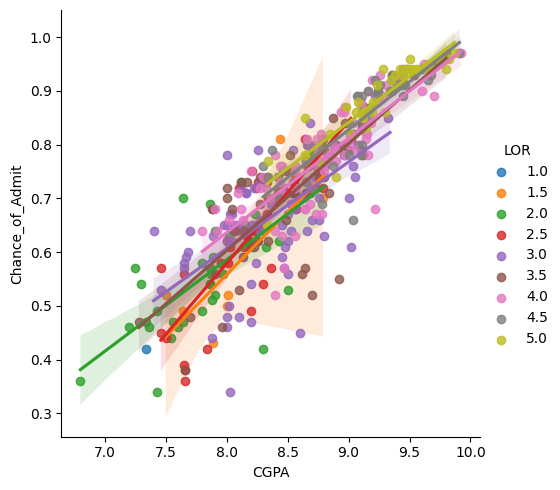

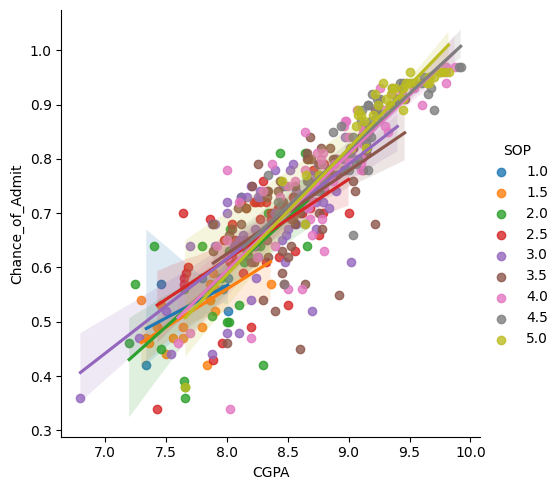

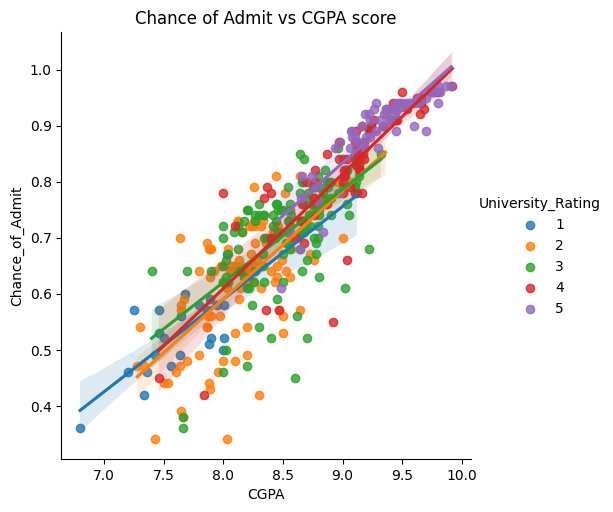

In [19]:
sns.lmplot(x='CGPA',y='Chance_of_Admit',data=data ,hue='Research')
sns.lmplot(x='CGPA',y='Chance_of_Admit',data=data ,hue='LOR')
sns.lmplot(x='CGPA',y='Chance_of_Admit',data=data ,hue='SOP')
sns.lmplot(x='CGPA',y='Chance_of_Admit',data=data ,hue='University_Rating')
plt.title('Chance of Admit vs CGPA score')

### Conclusiones de lo visualizado
- Desde el mapa de calor, vemos la correlación entre todos los parámetros y, en el caso de “Research” no tiene una correlación lineal con la variable a predecir, esto no quiere decir que se sacara la variable en el modelo, solo se observara de otra manera.
- De los plots para cada una de las variables nos damos cuenta que “University Rating”, “LOR” y “SOP” pueden considerarse como variables categóricas, sin embargo vemos una correlación lineal de estas variables contra la variable a predecir y se comparara los modelos categoricos y los no categoricos para cada variables.
- Viendo las regresiones lineales simple podemos ver los comportamientos que tienen las variables categoricas con cada una de las variables y se puede observar que en las variables University Rating y SOP hay mas disperisión en los datos.


## Análisis Predictivo
##### Vamos a tomar en cuenta el comportamiento de la variable research como variable categórica y de las demás variables categoría se hará una comparación entre tomarla como parte del modelo o como categórica y comparar los resultados

### Modelo base
##### Como ya hemos visto en el mapa de calor, existen tres variables con una fuerte correlacion lineal, es por eso que se tomo la decisión de hacer una regresión lineal multiple con esas tres variables predictoras

In [20]:
a = np.random.randn(len(data))

y_predic = "Chance_of_Admit"
x_columns_base = ["GRE_Score", "TOEF_Score", "CGPA"]
modelo = ["Intercep","GRE_Score", "TOEF_Score", "CGPA"]

data_base = pd.read_csv(r"C:\Users\guill\Desktop\p\MC\Temas\tareas\adm_data.csv", index_col= 0)

check = (a < .8)
entrenamiento = data_base[check]
testeo = data_base[~check]

y_train = entrenamiento[["Chance_of_Admit"]]
x_train_base = entrenamiento[["GRE_Score", "TOEF_Score", "CGPA"]]

entrenamiento

,GRE_Score,TOEF_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,329,111,4,4.5,4.0,9.23,1,0.89
396,324,110,3,3.5,3.5,9.04,1,0.82
397,325,107,3,3.0,3.5,9.11,1,0.84


In [21]:
print(list(zip(modelo, regresion_lineal(entrenamiento, x_columns_base,y_predic))))
print("El modelo de regresión lineal queda de la forma:")
display(Math(r'Chance \ of \ Admit  = - 1.657397 + .002423 * GRE \ Score + .001858 * TOEFL \ Score + .156455 * CGPA'))



[('Intercep', -1.6498755862309054), ('GRE_Score', 0.002809827217276073), ('TOEF_Score', 0.002533085284106562), ('CGPA', 0.14136039425297398)]
El modelo de regresión lineal queda de la forma:


<IPython.core.display.Math object>

In [22]:
lm = LinearRegression()
lm.fit(x_train_base,y_train)
modelo_s = {}

modelo_s = pd.DataFrame(lm.coef_ , columns = x_train_base.columns.values.tolist())
modelo_s["b0"] = lm.intercept_
print("r^2: ",lm.score(x_train_base,y_train))
modelo_s

r^2:  0.7914529089287055


,GRE_Score,TOEF_Score,CGPA,b0
0,0.00281,0.002533,0.14136,-1.649876


#### Error

In [23]:
aux = 0
aux = -1.601422 + (0.002401 * entrenamiento["GRE_Score"]) + (0.003053 * entrenamiento["TOEF_Score"]) + (0.143908 * entrenamiento["CGPA"] )
aux.tolist()

SSD = sum((entrenamiento["Chance_of_Admit"] - aux)**2)

RSE = np.sqrt(SSD / (len (entrenamiento) - 4 ))

chance_promedio = np.mean(entrenamiento["Chance_of_Admit"])

error = RSE / chance_promedio

error

0.08885526150770665

#### Prueba de Hipotesis

In [24]:
lm_b = smf.ols(formula = "Chance_of_Admit~GRE_Score+TOEF_Score+CGPA", data= entrenamiento).fit()
lm_b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance_of_Admit   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     394.7
Date:                Mon, 28 Nov 2022   Prob (F-statistic):          7.86e-106
Time:                        17:00:53   Log-Likelihood:                 418.97
No. Observations:                 316   AIC:                            -829.9
Df Residuals:                     312   BIC:                            -814.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.6499      0.120    -13.757      0.000      -1.886      -1.414
GRE_Score      0.0028      0.001      4.223      0.000       0.002       0.004
TOEF_Score     0.0025      0.001      2.093      0.037       0.000       0.005
CGPA           0.1414      0.012     12.079      0.000       0.118       0.164
==============================================================================
Omnibus:                       71.161   Durbin-Watson:                   0.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.787
Skew:                          -1.174   Prob(JB):                     2.68e-31
Kurtosis:                       5.276   Cond. No.                     1.11e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Modelo de regresión lineal multiple base agregando la variable Research

In [25]:
columnas = data.columns.values.tolist()
dummy_research = pd.get_dummies(data["Research"], prefix = "research")
data_research = data[columnas].join(dummy_research)
data_research

,GRE_Score,TOEF_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit,research_0,research_1
Serial No.,,,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92,0,1
2,324,107,4,4.0,4.5,8.87,1,0.76,0,1
3,316,104,3,3.0,3.5,8.00,1,0.72,0,1
4,322,110,3,3.5,2.5,8.67,1,0.80,0,1
5,314,103,2,2.0,3.0,8.21,0,0.65,1,0
...,...,...,...,...,...,...,...,...,...,...
396,324,110,3,3.5,3.5,9.04,1,0.82,0,1
397,325,107,3,3.0,3.5,9.11,1,0.84,0,1
398,330,116,4,5.0,4.5,9.45,1,0.91,0,1


In [26]:


columnas = data_research.columns.values.tolist()

check = (a < .8)
entrenamiento_r = data_research[check]
testeo_r = data_research[~check]

x_columnas_research = ["GRE_Score", "TOEF_Score", "CGPA", "Research"]
x_columnas_research_c = ["GRE_Score", "TOEF_Score", "CGPA", "research_0","research_1"]

x_train_base = entrenamiento_r[["GRE_Score", "TOEF_Score", "CGPA", "Research"]]
x_train_base2c = entrenamiento_r[["GRE_Score", "TOEF_Score", "CGPA", "research_0","research_1"]]
y_train2 = entrenamiento_r[["Chance_of_Admit"]]

modelo_research = ["interception","GRE_Score", "TOEF_Score", "CGPA", "Research"]
modelo_research_c = ["interception","GRE_Score", "TOEF_Score", "CGPA", "research_0","research_1"]
entrenamiento_r


,GRE_Score,TOEF_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit,research_0,research_1
Serial No.,,,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92,0,1
2,324,107,4,4.0,4.5,8.87,1,0.76,0,1
3,316,104,3,3.0,3.5,8.00,1,0.72,0,1
4,322,110,3,3.5,2.5,8.67,1,0.80,0,1
5,314,103,2,2.0,3.0,8.21,0,0.65,1,0
...,...,...,...,...,...,...,...,...,...,...
395,329,111,4,4.5,4.0,9.23,1,0.89,0,1
396,324,110,3,3.5,3.5,9.04,1,0.82,0,1
397,325,107,3,3.0,3.5,9.11,1,0.84,0,1


#### Modelo No categorico

In [27]:
print(list(zip(modelo_research, regresion_lineal(entrenamiento_r, x_columnas_research,y_predic))))


[('interception', -1.498221798212312), ('GRE_Score', 0.0023428103674987197), ('TOEF_Score', 0.002673466146049124), ('CGPA', 0.1377266852334256), ('Research', 0.022509710963778542)]


In [28]:
lm_r = LinearRegression()
lm_r.fit(x_train_base,y_train2)
modelo_dresearch = {}

modelo_dresearch = pd.DataFrame(lm_r.coef_ , columns = x_train_base.columns.values.tolist())
modelo_dresearch["b0"] = lm_r.intercept_

display(Math(r'Chance \ of \ Admit = -1.502683 + 0.002185 * GRE \ Score + 0.003034 * TOEFL \ Score + 0.139622 * CGPA + 0.0203 * Research'))
modelo_dresearch


<IPython.core.display.Math object>

,GRE_Score,TOEF_Score,CGPA,Research,b0
0,0.002343,0.002673,0.137727,0.02251,-1.498222


#### Modelo Categorico

In [31]:
#print(list(zip(modelo_research_c, regresion_lineal(entrenamiento_r, x_columnas_research_c,y_predic))))

LinAlgError: Singular matrix

In [32]:
lm_rc = LinearRegression()
lm_rc.fit(x_train_base2c,y_train)

modelo_dresearch_c = {}
modelo_dresearch_c = pd.DataFrame(lm_rc.coef_, columns = x_train_base2c.columns.values.tolist())
modelo_dresearch_c["b0"] = lm_rc.intercept_


display(Math(r'Chance \ of \ Admit = -1.267598 + 0.00136 * GRE \ Score + 0.002863 * TOEFL \ Score + 0.145653 * CGPA -0.015822 * research_0 + 0.015822 * research_1'))
modelo_dresearch_c

<IPython.core.display.Math object>

,GRE_Score,TOEF_Score,CGPA,research_0,research_1,b0
0,0.002343,0.002673,0.137727,-0.011255,0.011255,-1.486967


#### Comparacion de r^2 de ambos modelos

In [33]:
print("No categorica: ",lm_r.score(x_train_base,y_train),"\n Categorica: ",lm_rc.score(x_train_base2c,y_train))



No categorica:  0.7956934435754108 
 Categorica:  0.7956934435754107


Tenemos que la diferencia de las r^2 no es significativaa por eso se tomara el modelo más simple

### Modelo de regresión lineal multiple base agregando la variable University rating

In [34]:
columnas = data.columns.values.tolist()
dummy_rating = pd.get_dummies(data["University_Rating"], prefix = "Rating")
data_rating = data[columnas].join(dummy_rating)
data_rating

,GRE_Score,TOEF_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit,Rating_1,Rating_2,Rating_3,Rating_4,Rating_5
Serial No.,,,,,,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92,0,0,0,1,0
2,324,107,4,4.0,4.5,8.87,1,0.76,0,0,0,1,0
3,316,104,3,3.0,3.5,8.00,1,0.72,0,0,1,0,0
4,322,110,3,3.5,2.5,8.67,1,0.80,0,0,1,0,0
5,314,103,2,2.0,3.0,8.21,0,0.65,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,324,110,3,3.5,3.5,9.04,1,0.82,0,0,1,0,0
397,325,107,3,3.0,3.5,9.11,1,0.84,0,0,1,0,0
398,330,116,4,5.0,4.5,9.45,1,0.91,0,0,0,1,0


In [35]:
check = (a < .8)
entrenamiento_rating = data_rating[check]
testeo_rating = data_rating[~check]

x_columnas_rating = ["GRE_Score", "TOEF_Score", "CGPA", "University_Rating"]
x_columnas_rating_c = ["GRE_Score", "TOEF_Score", "CGPA", "Rating_1", "Rating_2","Rating_3","Rating_4","Rating_5"]

x_train_base_rating = entrenamiento_rating[["GRE_Score", "TOEF_Score", "CGPA", "University_Rating"]]
x_train_base_rating_c = entrenamiento_rating[["GRE_Score", "TOEF_Score", "CGPA", "Rating_1", "Rating_2","Rating_3","Rating_4","Rating_5"]]
y_train_rating = entrenamiento_rating[["Chance_of_Admit"]]

modelo_rating=  ["Intercept","GRE_Score", "TOEF_Score", "CGPA", "University_Rating"]
modelo_rating_c = ["Intercept","GRE_Score", "TOEF_Score", "CGPA", "Rating_1", "Rating_2","Rating_3","Rating_4","Rating_5"]
entrenamiento_rating


,GRE_Score,TOEF_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit,Rating_1,Rating_2,Rating_3,Rating_4,Rating_5
Serial No.,,,,,,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92,0,0,0,1,0
2,324,107,4,4.0,4.5,8.87,1,0.76,0,0,0,1,0
3,316,104,3,3.0,3.5,8.00,1,0.72,0,0,1,0,0
4,322,110,3,3.5,2.5,8.67,1,0.80,0,0,1,0,0
5,314,103,2,2.0,3.0,8.21,0,0.65,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,329,111,4,4.5,4.0,9.23,1,0.89,0,0,0,1,0
396,324,110,3,3.5,3.5,9.04,1,0.82,0,0,1,0,0
397,325,107,3,3.0,3.5,9.11,1,0.84,0,0,1,0,0


##### Modelo sin categorico

In [36]:
print(list(zip(modelo_rating, regresion_lineal(entrenamiento_rating, x_columnas_rating,y_predic))))


[('Intercept', -1.5265930934201193), ('GRE_Score', 0.002751781816566786), ('TOEF_Score', 0.002029439552635504), ('CGPA', 0.1315512168454969), ('University_Rating', 0.01078507281663993)]


In [37]:
lm_rating = LinearRegression()
lm_rating.fit(x_train_base_rating,y_train_rating)
modelo_drating = {}

modelo_drating = pd.DataFrame(lm_rating.coef_ , columns = x_train_base_rating.columns.values.tolist())
modelo_drating["b0"] = lm_rating.intercept_

display(Math(r'Chance \ of \ Admit = -1.508599 + 0.002567 * GRE \ Score + 0.002522 * TOEFL \ Score + 0.129749 * CGPA + 0.011617 * University \ Rating'))
modelo_drating

<IPython.core.display.Math object>

,GRE_Score,TOEF_Score,CGPA,University_Rating,b0
0,0.002752,0.002029,0.131551,0.010785,-1.526593


##### Modelo categorico

In [38]:
print(list(zip(modelo_rating_c, regresion_lineal(entrenamiento_rating, x_columnas_rating_c,y_predic))))

[('Intercept', 26.328281250000007), ('GRE_Score', -0.053388523676502514), ('TOEF_Score', 0.005295807378449858), ('CGPA', -0.36735708942493117), ('Rating_1', -8.622929687499996), ('Rating_2', -7.3232421874999964), ('Rating_3', -6.373710937499996), ('Rating_4', -6.449414062499996), ('Rating_5', -6.4620312499999955)]


In [39]:
lm_rating_c = LinearRegression()
lm_rating_c.fit(x_train_base_rating_c,y_train_rating)
modelo_drating_c = {}

modelo_drating_c = pd.DataFrame(lm_rating_c.coef_ , columns = x_train_base_rating_c.columns.values.tolist())
modelo_drating_c["b0"] = lm_rating_c.intercept_

display(Math(r'Chance \ of \ Admit = -1.467998 + 0.002511 * GRE \ Score + 0.002587 * TOEFL \ Score + 0.130529 * CGPA  -0.013852 * University \ Rating \ 1 -0.016509 * University \ Rating \ 2 -0.001764 * University \ Rating \ 3 + 0.009708 * University \ Rating \ 4 + 0.022417 * University \ Rating \ 5'))
modelo_drating_c

<IPython.core.display.Math object>

,GRE_Score,TOEF_Score,CGPA,Rating_1,Rating_2,Rating_3,Rating_4,Rating_5,b0
0,0.002697,0.002204,0.132287,-0.009609,-0.016284,-0.000049,0.00236,0.023583,-1.499735


##### Comparacion de R^2

In [40]:
print("No categorica: ",lm_rating.score(x_train_base_rating,y_train),"\n Categorica: ",lm_rating_c.score(x_train_base_rating_c,y_train))



No categorica:  0.7947177383631139 
 Categorica:  0.7959885615982658


### Modelo de regresión lineal multiple base agregando la variable LOR

#### Datos

In [41]:
columnas = data.columns.values.tolist()
dummy_LOR = pd.get_dummies(data["LOR"], prefix = "LOR")
data_lor = data[columnas].join(dummy_LOR)
data_lor

,GRE_Score,TOEF_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit,LOR_1.0,LOR_1.5,LOR_2.0,LOR_2.5,LOR_3.0,LOR_3.5,LOR_4.0,LOR_4.5,LOR_5.0
Serial No.,,,,,,,,,,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92,0,0,0,0,0,0,0,1,0
2,324,107,4,4.0,4.5,8.87,1,0.76,0,0,0,0,0,0,0,1,0
3,316,104,3,3.0,3.5,8.00,1,0.72,0,0,0,0,0,1,0,0,0
4,322,110,3,3.5,2.5,8.67,1,0.80,0,0,0,1,0,0,0,0,0
5,314,103,2,2.0,3.0,8.21,0,0.65,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,324,110,3,3.5,3.5,9.04,1,0.82,0,0,0,0,0,1,0,0,0
397,325,107,3,3.0,3.5,9.11,1,0.84,0,0,0,0,0,1,0,0,0
398,330,116,4,5.0,4.5,9.45,1,0.91,0,0,0,0,0,0,0,1,0


In [42]:
check = (a < .8)
entrenamiento_lor = data_lor[check]
testeo_lor = data_lor[~check]

x_columnas_lor = ["GRE_Score", "TOEF_Score", "CGPA", "LOR"]
x_columnas_lor_c =  ["GRE_Score", "TOEF_Score", "CGPA", "LOR_1.0","LOR_1.5","LOR_2.0","LOR_2.5","LOR_3.0","LOR_3.5","LOR_4.0","LOR_4.5","LOR_5.0"]

x_train_base_lor = entrenamiento_lor[["GRE_Score", "TOEF_Score", "CGPA", "LOR"]]
x_train_base_lor_c = entrenamiento_lor[["GRE_Score", "TOEF_Score", "CGPA", "LOR_1.0","LOR_1.5","LOR_2.0","LOR_2.5","LOR_3.0","LOR_3.5","LOR_4.0","LOR_4.5","LOR_5.0"]]
y_train_lor = entrenamiento_lor[["Chance_of_Admit"]]

modelo_lor=  ["Intercept","GRE_Score", "TOEF_Score", "CGPA", "LOR"]
modelo_lor_c = ["Intercept","GRE_Score", "TOEF_Score", "CGPA", "LOR_1.0","LOR_1.5","LOR_2.0","LOR_2.5","LOR_3.0","LOR_3.5","LOR_4.0","LOR_4.5","LOR_5.0"]
entrenamiento_lor

,GRE_Score,TOEF_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit,LOR_1.0,LOR_1.5,LOR_2.0,LOR_2.5,LOR_3.0,LOR_3.5,LOR_4.0,LOR_4.5,LOR_5.0
Serial No.,,,,,,,,,,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92,0,0,0,0,0,0,0,1,0
2,324,107,4,4.0,4.5,8.87,1,0.76,0,0,0,0,0,0,0,1,0
3,316,104,3,3.0,3.5,8.00,1,0.72,0,0,0,0,0,1,0,0,0
4,322,110,3,3.5,2.5,8.67,1,0.80,0,0,0,1,0,0,0,0,0
5,314,103,2,2.0,3.0,8.21,0,0.65,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,329,111,4,4.5,4.0,9.23,1,0.89,0,0,0,0,0,0,1,0,0
396,324,110,3,3.5,3.5,9.04,1,0.82,0,0,0,0,0,1,0,0,0
397,325,107,3,3.0,3.5,9.11,1,0.84,0,0,0,0,0,1,0,0,0


#### Modelo No categorico

In [43]:
print(list(zip(modelo_lor, regresion_lineal(entrenamiento_lor, x_columnas_lor,y_predic))))

[('Intercept', -1.5437627966098921), ('GRE_Score', 0.002851632162022331), ('TOEF_Score', 0.0023426478272180534), ('CGPA', 0.12129394830823133), ('LOR', 0.021150476068719472)]


In [44]:
lm_lor = LinearRegression()
lm_lor.fit(x_train_base_lor,y_train_lor)
modelo_dlor = {}

modelo_dlor = pd.DataFrame(lm_lor.coef_ , columns = x_train_base_lor.columns.values.tolist())
modelo_dlor["b0"] = lm_lor.intercept_

display(Math(r'Chance \ of \ Admit = -1.419068 + 0.002362 * GRE \ Score + 0.002166 * TOEFL \ Score + 0.129795 * CGPA + 0.023613 * LOR'))
modelo_dlor

<IPython.core.display.Math object>

,GRE_Score,TOEF_Score,CGPA,LOR,b0
0,0.002852,0.002343,0.121294,0.02115,-1.543763


#### Modelo Categorico

In [45]:
#print(list(zip(modelo_lor_c, regresion_lineal(entrenamiento_lor, x_columnas_lor_c,y_predic))))

LinAlgError: Singular matrix

In [46]:
lm_lor_c = LinearRegression()
lm_lor_c.fit(x_train_base_lor_c,y_train_lor)
modelo_dlor_c = {}

modelo_dlor_c = pd.DataFrame(lm_lor_c.coef_ , columns = x_train_base_lor_c.columns.values.tolist())
modelo_dlor_c["b0"] = lm_lor_c.intercept_

display(Math(r'Chance \ of \ Admit = -1.420869 + 0.002579 * GRE \ Score + 0.002499* TOEFL \ Score + 0.122007 * CGPA -0.060629 * LOR_{1.0} -0.033728* LOR_{1.5} -0.013655*LOR_{2.0} -0.010285	 * LOR_{2.5} -0.003593* LOR_{3.0} + 0.007921*LOR_{3.5} + 0.028188 * LOR_{4.0} + 0.034129* LOR_{4.5} + 0.051652*LOR_{5.0}'))
modelo_dlor_c

<IPython.core.display.Math object>

,GRE_Score,TOEF_Score,CGPA,LOR_1.0,LOR_1.5,LOR_2.0,LOR_2.5,LOR_3.0,LOR_3.5,LOR_4.0,LOR_4.5,LOR_5.0,b0
0,0.002806,0.002445,0.121916,2.602085e-18,-0.041681,-0.013733,-0.016328,-0.012144,-0.000392,0.02017,0.023751,0.040357,-1.476444


#### Comparación de R^2

In [47]:
print("No categorica: ",lm_lor.score(x_train_base_lor,y_train_lor),"\n Categorica: ",lm_lor_c.score(x_train_base_lor_c,y_train_lor))



No categorica:  0.8017597306476547 
 Categorica:  0.8035484544350955


### Modelo de regresión lineal multiple base agregando la variable SOP

#### Datos

In [48]:
columnas = data.columns.values.tolist()
dummy_sop = pd.get_dummies(data["SOP"], prefix = "SOP")
data_sop = data[columnas].join(dummy_sop)
data_sop

,GRE_Score,TOEF_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit,SOP_1.0,SOP_1.5,SOP_2.0,SOP_2.5,SOP_3.0,SOP_3.5,SOP_4.0,SOP_4.5,SOP_5.0
Serial No.,,,,,,,,,,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92,0,0,0,0,0,0,0,1,0
2,324,107,4,4.0,4.5,8.87,1,0.76,0,0,0,0,0,0,1,0,0
3,316,104,3,3.0,3.5,8.00,1,0.72,0,0,0,0,1,0,0,0,0
4,322,110,3,3.5,2.5,8.67,1,0.80,0,0,0,0,0,1,0,0,0
5,314,103,2,2.0,3.0,8.21,0,0.65,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,324,110,3,3.5,3.5,9.04,1,0.82,0,0,0,0,0,1,0,0,0
397,325,107,3,3.0,3.5,9.11,1,0.84,0,0,0,0,1,0,0,0,0
398,330,116,4,5.0,4.5,9.45,1,0.91,0,0,0,0,0,0,0,0,1


In [49]:
check = (a < .8)
entrenamiento_sop = data_sop[check]
testeo_sop = data_sop[~check]

x_columnas_sop = ["GRE_Score", "TOEF_Score", "CGPA", "SOP"]
x_columnas_sop_c =  ["GRE_Score", "TOEF_Score", "CGPA", "SOP_1.0","SOP_1.5","SOP_2.0","SOP_2.5","SOP_3.0","SOP_3.5","SOP_4.0","SOP_4.5","SOP_5.0"]

x_train_base_sop = entrenamiento_sop[["GRE_Score", "TOEF_Score", "CGPA", "SOP"]]
x_train_base_sop_c = entrenamiento_sop[["GRE_Score", "TOEF_Score", "CGPA", "SOP_1.0","SOP_1.5","SOP_2.0","SOP_2.5","SOP_3.0","SOP_3.5","SOP_4.0","SOP_4.5","SOP_5.0"]]
y_train_sop = entrenamiento_sop[["Chance_of_Admit"]]

modelo_sop=  ["Intercept","GRE_Score", "TOEF_Score", "CGPA", "SOP"]
modelo_sop_c = ["Intercept","GRE_Score", "TOEF_Score", "CGPA", "SOP_1.0","SOP_1.5","SOP_2.0","SOP_2.5","SOP_3.0","SOP_3.5","SOP_4.0","SOP_4.5","SOP_5.0"]
entrenamiento_sop

,GRE_Score,TOEF_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit,SOP_1.0,SOP_1.5,SOP_2.0,SOP_2.5,SOP_3.0,SOP_3.5,SOP_4.0,SOP_4.5,SOP_5.0
Serial No.,,,,,,,,,,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92,0,0,0,0,0,0,0,1,0
2,324,107,4,4.0,4.5,8.87,1,0.76,0,0,0,0,0,0,1,0,0
3,316,104,3,3.0,3.5,8.00,1,0.72,0,0,0,0,1,0,0,0,0
4,322,110,3,3.5,2.5,8.67,1,0.80,0,0,0,0,0,1,0,0,0
5,314,103,2,2.0,3.0,8.21,0,0.65,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,329,111,4,4.5,4.0,9.23,1,0.89,0,0,0,0,0,0,0,1,0
396,324,110,3,3.5,3.5,9.04,1,0.82,0,0,0,0,0,1,0,0,0
397,325,107,3,3.0,3.5,9.11,1,0.84,0,0,0,0,1,0,0,0,0


#### Modelo no categorico

In [50]:
print(list(zip(modelo_sop, regresion_lineal(entrenamiento_sop, x_columnas_sop,y_predic))))

[('Intercept', -1.6090055159629133), ('GRE_Score', 0.0028510071559136323), ('TOEF_Score', 0.0022734191658329286), ('CGPA', 0.13591133698766952), ('SOP', 0.006043760341793074)]


In [51]:
lm_sop = LinearRegression()
lm_sop.fit(x_train_base_sop,y_train_sop)
modelo_dsop = {}

modelo_dsop = pd.DataFrame(lm_sop.coef_ , columns = x_train_base_sop.columns.values.tolist())
modelo_dsop["b0"] = lm_sop.intercept_

display(Math(r'Chance \ of \ Admit = -1.503781 + 0.002533 * GRE \ Score + 0.002286 * TOEFL \ Score + 0.132345 * CGPA + 0.012571 * SOP'))
modelo_dsop

<IPython.core.display.Math object>

,GRE_Score,TOEF_Score,CGPA,SOP,b0
0,0.002851,0.002273,0.135911,0.006044,-1.609006


#### Modelo Categorico

In [52]:
#print(list(zip(modelo_sop_c, regresion_lineal(entrenamiento_sop, x_columnas_sop_c,y_predic))))

In [53]:
lm_sop_c = LinearRegression()
lm_sop_c.fit(x_train_base_sop_c,y_train_sop)
modelo_dsop_c = {}

modelo_dsop_c = pd.DataFrame(lm_sop_c.coef_ , columns = x_train_base_sop_c.columns.values.tolist())
modelo_dsop_c["b0"] = lm_sop_c.intercept_

display(Math(r'Chance \ of \ Admit = -1.478403 + 0.002559 * GRE \ Score + 0.002516 * TOEFL \ Score + 0.130189 * CGPA + -0.007071 * SOP_{1.0} -0.02113* SOP_{1.5} -0.024223 * SOP_{2.0} -0.002659 * SOP_{2.5} + 0.005314* SOP_{3.0} -0.002585 * SOP_{3.5} + 0.003638 * SOP_{4.0} + 0.010822* SOP_{4.5} +	0.037895 * SOP_{5.0}'))
modelo_dsop_c

<IPython.core.display.Math object>

,GRE_Score,TOEF_Score,CGPA,SOP_1.0,SOP_1.5,SOP_2.0,SOP_2.5,SOP_3.0,SOP_3.5,SOP_4.0,SOP_4.5,SOP_5.0,b0
0,0.002851,0.00249,0.132531,0.004034,-0.025109,-0.001579,0.003421,-0.006341,-0.001179,-0.00258,0.005223,0.024111,-1.582776


#### Comparación de R^2

In [54]:
print("No categorica: ",lm_sop.score(x_train_base_sop,y_train_sop),"\n Categorica: ",lm_sop_c.score(x_train_base_sop_c,y_train_sop))

No categorica:  0.792337823792297 
 Categorica:  0.7950724470981414


### Resumen

##### Se pudo observar que en todas al ser variables numericas vimos como las pruebas r^2 no se dispersaron mucho, ademas al tener un Dataset muy pequeño se opto por tratarlas como variables normales, en lugar de categoricas para poder tener un mejor modelo

## Analisis Predictivo


##### En el punto anterior pudimos observar que apartir de un modelo base, como se comportan las variables categoricas agrupandolas y no agrupandolas y se hizo la pruba r cuadrada para cada caso y no se encontro mejorias significativas para no agruparlas, es por eso que en esta sección se considerara una regresión lineal multiple con todas las variables sin agrupación y se haran las prubas para determinar si es la mejor opción

### Regresión lineal multiple con todas las variables como predictoras

#### Datos

In [55]:

x_columns_mult = ["GRE_Score", "TOEF_Score", "CGPA", "SOP", "LOR", "University_Rating", "Research"]

data_base = pd.read_csv(r"C:\Users\guill\Desktop\p\MC\Temas\tareas\adm_data.csv", index_col= 0)

check = (a < .8)
entrenamiento_m = data_base[check]
testeo_m = data_base[~check]

modelo_mult = ["Intercept" , "GRE_Score", "TOEF_Score", "CGPA", "SOP", "LOR", "University_Rating", "Research"]

y_train_m = entrenamiento_m[["Chance_of_Admit"]]
x_train_m = entrenamiento_m[["GRE_Score", "TOEF_Score", "CGPA", "SOP", "LOR", "University_Rating", "Research"]]

entrenamiento_m

,GRE_Score,TOEF_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,329,111,4,4.5,4.0,9.23,1,0.89
396,324,110,3,3.5,3.5,9.04,1,0.82
397,325,107,3,3.0,3.5,9.11,1,0.84


#### Modelo

In [56]:
print(list(zip(modelo_mult, regresion_lineal(entrenamiento_m, x_columns_mult, y_predic))))

[('Intercept', -1.3794860391301427), ('GRE_Score', 0.002326810543006097), ('TOEF_Score', 0.0025200661935151913), ('CGPA', 0.11854608567825409), ('SOP', -0.008658708031723084), ('LOR', 0.022283403764108867), ('University_Rating', 0.006728426909386798), ('Research', 0.020814764592863355)]


In [57]:
lm_m = LinearRegression()
lm_m.fit(x_train_m,y_train_m)
modelo_m = {}

modelo_m = pd.DataFrame(lm_m.coef_ , columns = x_train_m.columns.values.tolist())
modelo_m["b0"] = lm_m.intercept_

print("El modelo de regresión lineal queda de la forma:")
display(Math(r'Chance \ of \ Admit  = 	-1.244028 + 0.001903 * GRE \ Score + 0.002438 * TOEFL \ Score + 0.116411 * CGPA - -0.001317 * SOP + 0.0191 LOR + 0.009468 * University \ Rating + 0.020616 * Research'))

print("r^2: ",lm_m.score(x_train_m, y_train_m))



modelo_m

El modelo de regresión lineal queda de la forma:


<IPython.core.display.Math object>

r^2:  0.8070020676605304


,GRE_Score,TOEF_Score,CGPA,SOP,LOR,University_Rating,Research,b0
0,0.002327,0.00252,0.118546,-0.008659,0.022283,0.006728,0.020815,-1.379486


##### Aquí se tiene un problema, al tener un modelo mas complejo, se esperaria que el valor de R^2 aumentase sin embargo el incremento en el valor es insignificante o no es lo esperado al modelo base asi que se se le sometera a unas pruebas y observar que pasa

#### VIF

- GRE = TOEF + CGPA + UR + SOP + LOR + Research
- TOEF = GRE + CGPA + UR + SOP + LOR + Research
- CGPA = GRE + TOEF + + UR + SOP + LOR + Research
- UR = GRE + TOEF + CGPA  + SOP + LOR + Research
- SOP = GRE + TOEF + CGPA  + UR + LOR + Research
- LOR = GRE + TOEF + CGPA  + UR + SOP + Research
- Research = GRE + TOEF + CGPA  + UR + SOP + LOR

In [58]:
display(Math(r'\begin{cases} VIF = 1 \Rightarrow No  \ existe \ una \ multicolienalidad \\ 1 < VIF < 5 \Rightarrow Existe \ una \ cierta \ multicolienalidad \ sin \ embargo \ no \ requiere \ atención \\ VIF > 5 \Rightarrow Existe  \ una \ multicolienalidad \end{cases}'))

<IPython.core.display.Math object>

In [59]:
slm_gre = smf.ols(formula = "GRE_Score~TOEF_Score+CGPA+SOP+LOR+University_Rating+Research", data = entrenamiento_m).fit()
r2_gre = slm_gre.rsquared
VIF_gre = 1 / (1 - r2_gre)
VIF_gre

4.526148904156622

In [60]:
slm_toef = smf.ols(formula = "TOEF_Score~GRE_Score+CGPA+SOP+LOR+University_Rating+Research", data = entrenamiento_m).fit()
r2_toef = slm_toef.rsquared
VIF_toef = 1 / (1 - r2_toef)
VIF_toef

4.2615329829527075

In [61]:
slm_cgpa = smf.ols(formula = "CGPA~GRE_Score+TOEF_Score+SOP+LOR+University_Rating+Research", data = entrenamiento_m).fit()
r2_cgpa = slm_cgpa.rsquared
VIF_cgpa = 1 / (1 - r2_cgpa)
VIF_cgpa

4.775621824056231

In [62]:
slm_sop = smf.ols(formula = "SOP~GRE_Score+TOEF_Score+CGPA+LOR+University_Rating+Research", data = entrenamiento_m).fit()
r2_sop = slm_sop.rsquared
VIF_sop = 1 / (1 - r2_sop)
VIF_sop

2.8910400627844917

In [63]:
slm_lor = smf.ols(formula = "LOR~GRE_Score+TOEF_Score+CGPA+SOP+University_Rating+Research", data = entrenamiento_m).fit()
r2_lor = slm_lor.rsquared
VIF_lor = 1 / (1 - r2_lor)
VIF_lor

2.381936537567835

In [64]:
slm_ur = smf.ols(formula = "University_Rating~GRE_Score+TOEF_Score+CGPA+SOP+LOR+Research", data = entrenamiento_m).fit()
r2_ur = slm_ur.rsquared
VIF_ur = 1 / (1 - r2_ur)
VIF_ur

2.7450400206664236

In [65]:
slm_rr = smf.ols(formula = "Research~GRE_Score+TOEF_Score+CGPA+SOP+LOR+University_Rating", data = entrenamiento_m).fit()
r2_rr = slm_rr.rsquared
VIF_rr = 1 / (1 - r2_rr)
VIF_rr

1.5078115279746507

#### Prueba de Hipotesis

In [66]:
slm_m = smf.ols(formula = "Chance_of_Admit~GRE_Score+TOEF_Score+CGPA+SOP+LOR+University_Rating+Research", data = entrenamiento_m).fit()
slm_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance_of_Admit   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     184.0
Date:                Mon, 28 Nov 2022   Prob (F-statistic):          5.05e-106
Time:                        17:05:08   Log-Likelihood:                 431.21
No. Observations:                 316   AIC:                            -846.4
Df Residuals:                     308   BIC:                            -816.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.3795      0.140     -9.883      0.000      -1.654      -1.105
GRE_Score             0.0023      0.001      3.462      0.001       0.001       0.004
TOEF_Score            0.0025      0.001      2.087      0.038       0.000       0.005
CGPA                  0.1185      0.013      9.230      0.000       0.093       0.144
SOP                  -0.0087      0.006     -1.425      0.155      -0.021       0.003
LOR                   0.0223      0.006      3.691      0.000       0.010       0.034
University_Rating     0.0067      0.005      1.298      0.195      -0.003       0.017
Research              0.0208      0.009      2.389      0.018       0.004       0.038
==============================================================================
Omnibus:                       74.980   Durbin-Watson:                   0.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.254
Skew:                          -1.215   Prob(JB):                     3.19e-34
Kurtosis:                       5.410   Cond. No.                     1.33e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Error

In [67]:
aux2 = 0
aux2 = -1.211823 + (0.001687 * entrenamiento_m["GRE_Score"]) + (0.003719* entrenamiento_m["TOEF_Score"]) + (0.104078 * entrenamiento_m["CGPA"] ) + (	0.005099 * entrenamiento_m["SOP"]) + (.016637 * entrenamiento_m["LOR"]) + (0.006045	*entrenamiento_m["University_Rating"]) + (0.029046* entrenamiento_m["Research"])
aux2.tolist()

SSD2 = sum((entrenamiento_m["Chance_of_Admit"] - aux2)**2)

RSE2 = np.sqrt(SSD2 / (len (entrenamiento_m) - 8 ))

chance_promedio2 = np.mean(entrenamiento_m["Chance_of_Admit"])

error2 = RSE2 / chance_promedio2

error2

0.08709276480022884

### Regresión lineal modificado

#### Datos

In [68]:

x_columns_mult2 = ["GRE_Score", "TOEF_Score", "CGPA", "LOR",  "Research"]

data_base = pd.read_csv(r"C:\Users\guill\Desktop\p\MC\Temas\tareas\adm_data.csv", index_col= 0)

check = (a < .8)
entrenamiento_m2 = data_base[check]
testeo_m2 = data_base[~check]

modelo_mult2 = ["Intercept" , "GRE_Score", "TOEF_Score", "CGPA",  "LOR", "Research"]

y_train_m2 = entrenamiento_m2[["Chance_of_Admit"]]
x_train_m2 = entrenamiento_m2[["GRE_Score", "TOEF_Score", "CGPA",  "LOR", "Research"]]

entrenamiento_m

,GRE_Score,TOEF_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,329,111,4,4.5,4.0,9.23,1,0.89
396,324,110,3,3.5,3.5,9.04,1,0.82
397,325,107,3,3.0,3.5,9.11,1,0.84


#### Modelo

In [69]:
print(list(zip(modelo_mult2, regresion_lineal(entrenamiento_m2, x_columns_mult2, y_predic))))

[('Intercept', -1.4115135736267206), ('GRE_Score', 0.0024300711194887997), ('TOEF_Score', 0.0024762663027497397), ('CGPA', 0.11880509150767615), ('LOR', 0.020329861993202414), ('Research', 0.020240611966498623)]


In [70]:
slm_m2 = LinearRegression()
slm_m2.fit(x_train_m2,y_train_m2)
modelo_m2 = {}

modelo_m2 = pd.DataFrame(slm_m2.coef_ , columns = x_train_m2.columns.values.tolist())
modelo_m2["b0"] = slm_m2.intercept_

print("El modelo de regresión lineal queda de la forma:")
display(Math(r'Chance \ of \ Admit  = 	-1.293335 + 0.001668	 * GRE \ Score +0.00424 * TOEFL \ Score + 0.110115 * CGPA + 0.02098	 LOR  + 0.030574 * Research'))

print("r^2: ",slm_m2.score(x_train_m2, y_train_m2))



modelo_m2




El modelo de regresión lineal queda de la forma:


<IPython.core.display.Math object>

r^2:  0.805172903976326


,GRE_Score,TOEF_Score,CGPA,LOR,Research,b0
0,0.00243,0.002476,0.118805,0.02033,0.020241,-1.411514


#### VIF

- GRE = TOEF + CGPA + UR + LOR + Research
- TOEF = GRE + CGPA + UR  + LOR + Research
- CGPA = GRE + TOEF + + UR  + LOR + Research
- UR = GRE + TOEF + CGPA  + LOR + Research
- LOR = GRE + TOEF + CGPA  + UR  + Research
- Research = GRE + TOEF + CGPA  + UR + LOR

In [71]:
display(Math(r'\begin{cases} VIF = 1 \Rightarrow No  \ existe \ una \ multicolienalidad \\ 1 < VIF < 5 \Rightarrow Existe \ una \ cierta \ multicolienalidad \ sin \ embargo \ no \ requiere \ atención \\ VIF > 5 \Rightarrow Existe  \ una \ multicolienalidad \end{cases}'))

<IPython.core.display.Math object>

In [72]:
slm_gre2 = smf.ols(formula = "GRE_Score~TOEF_Score+CGPA+LOR+Research", data = entrenamiento_m2).fit()
r2_gre2 = slm_gre2.rsquared
VIF_gre2 = 1 / (1 - r2_gre2)
VIF_gre2

4.487184139013426

In [73]:
slm_toef2 = smf.ols(formula = "TOEF_Score~GRE_Score+CGPA+LOR+Research", data = entrenamiento_m2).fit()
r2_toef2 = slm_toef2.rsquared
VIF_toef2 = 1 / (1 - r2_toef2)
VIF_toef2

4.028916468529606

In [74]:
slm_cgpa2 = smf.ols(formula = "CGPA~GRE_Score+TOEF_Score+LOR+Research", data = entrenamiento_m2).fit()
r2_cgpa2 = slm_cgpa2.rsquared
VIF_cgpa2 = 1 / (1 - r2_cgpa2)
VIF_cgpa2

4.458893692599322

In [75]:
slm_lor2 = smf.ols(formula = "LOR~GRE_Score+TOEF_Score+CGPA+Research", data = entrenamiento_m2).fit()
r2_lor2 = slm_lor2.rsquared
VIF_lor2 = 1 / (1 - r2_lor2)
VIF_lor2

1.7850456425204204

In [76]:
slm_r2 = smf.ols(formula = "Research~GRE_Score+TOEF_Score+CGPA+LOR", data = entrenamiento_m2).fit()
r2_r2 = slm_r2.rsquared
VIF_r2 = 1 / (1 - r2_r2)
VIF_r2

1.4934777144310316

#### Prueba de Hipotesis

In [77]:
slm_m2 = smf.ols(formula = "Chance_of_Admit~GRE_Score+TOEF_Score+CGPA+LOR+Research", data = entrenamiento_m2).fit()
slm_m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance_of_Admit   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     256.2
Date:                Mon, 28 Nov 2022   Prob (F-statistic):          8.37e-108
Time:                        17:05:10   Log-Likelihood:                 429.72
No. Observations:                 316   AIC:                            -847.4
Df Residuals:                     310   BIC:                            -824.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4115      0.132    -10.691      0.000      -1.671      -1.152
GRE_Score      0.0024      0.001      3.626      0.000       0.001       0.004
TOEF_Score     0.0025      0.001      2.106      0.036       0.000       0.005
CGPA           0.1188      0.012      9.559      0.000       0.094       0.143
LOR            0.0203      0.005      3.884      0.000       0.010       0.031
Research       0.0202      0.009      2.330      0.020       0.003       0.037
==============================================================================
Omnibus:                       75.294   Durbin-Watson:                   0.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.366
Skew:                          -1.226   Prob(JB):                     4.98e-34
Kurtosis:                       5.375   Cond. No.                     1.25e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Error

In [78]:
aux3 = 0
aux3 = -1.293335 + (0.001668 * entrenamiento_m2["GRE_Score"]) + (0.00424* entrenamiento_m2["TOEF_Score"]) + (0.110115 * entrenamiento_m2["CGPA"] ) + (0.02098 * entrenamiento_m2["LOR"]) +  (0.030574* entrenamiento_m2["Research"])
aux3.tolist()

SSD3 = sum((entrenamiento_m2["Chance_of_Admit"] - aux3)**2)

RSE3 = np.sqrt(SSD3 / (len (entrenamiento_m2) - 8 ))

chance_promedio3 = np.mean(entrenamiento_m2["Chance_of_Admit"])

error3 = RSE3 / chance_promedio3

error3

0.08676742419518614

### Resumen

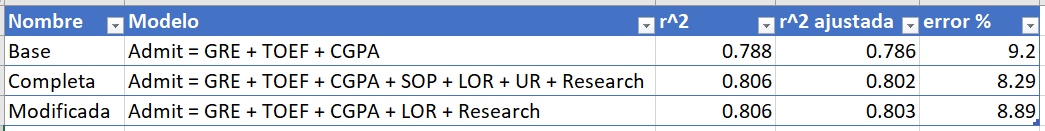

In [79]:
Image(filename="resumen.png")

##### Como se puede observar en el resumen la regresion lineal modificada tiene valores de la prueba r^2 y r^2 ajustada similares al modelo mas completo asi como el porcentaje de error de datos es muy pequeño es menos del 1%, es por esto que se propone como el modelo modificado como el mejor modelo para explicar los datos